In [1]:
# change present working directory to project directory
import os
os.chdir("../")

In [2]:
import pickle
import torch
import torch.nn as nn

#import os
#print(os.getcwd())

from data_preprocessing.custom_datasets import Dataset_3DCNN, collate_fn
import torch.utils.data as data
from models.text_model import Text_Model
from training.evaluation import evalMetric
from training.train_vision import train, validation
from training.test_model import test_model
from utils.utils import load_config, fix_the_random
import warnings
warnings.filterwarnings('ignore')

In [3]:
config = load_config('configs/configs.yaml')
fix_the_random(2021)

## ---------------------- Training ---------------------- ##

# load k-fold indexes
with open(config["PICKLE_FOLDER"]+'allFoldDetails.p', 'rb') as fp:
    allDataAnnotation = pickle.load(fp)

model_cls = Text_Model

dataset_cls = Dataset_3DCNN


performance_by_epoch, best_mean_metrics, best_std_metrics = test_model(
                                                                model_cls=model_cls,
                                                                dataset_cls=dataset_cls,
                                                                epochs=config["EPOCHS"],
                                                                optimizer_name="Adam",
                                                                allDataAnnotation=allDataAnnotation

                                                           )
with open(config["PICKLE_FOLDER"] + "Bert_unimodal_scores.p", "wb") as f:
    pickle.dump((performance_by_epoch, best_mean_metrics, best_std_metrics), f)



 20%|██        | 1/5 [00:01<00:04,  1.16s/it]


Train Epoch: 1 [699/758 (92%)]	Loss: 0.512417, Accu: 70.00%, MF1 Score: 0.6970
Val set: (109 samples): Average loss: 0.5640, Accuracy: 71.56%, MF1 Score: 0.6808
Test set: (217 samples): Average loss: 0.5493, Accuracy: 72.35%, MF1 Score: 0.6837

Train Epoch: 2 [699/758 (92%)]	Loss: 0.359686, Accu: 90.00%, MF1 Score: 0.8039
Val set: (109 samples): Average loss: 0.5414, Accuracy: 71.56%, MF1 Score: 0.7076
Test set: (217 samples): Average loss: 0.5299, Accuracy: 73.73%, MF1 Score: 0.7271


 40%|████      | 2/5 [00:01<00:01,  1.63it/s]


Train Epoch: 1 [700/758 (92%)]	Loss: 0.752808, Accu: 60.00%, MF1 Score: 0.5238
Val set: (109 samples): Average loss: 0.5430, Accuracy: 74.31%, MF1 Score: 0.7097
Test set: (216 samples): Average loss: 0.5286, Accuracy: 79.17%, MF1 Score: 0.7664

Train Epoch: 2 [700/758 (92%)]	Loss: 0.384671, Accu: 80.00%, MF1 Score: 0.7619
Val set: (109 samples): Average loss: 0.5112, Accuracy: 76.15%, MF1 Score: 0.7125
Test set: (216 samples): Average loss: 0.5104, Accuracy: 75.93%, MF1 Score: 0.7164


 60%|██████    | 3/5 [00:01<00:00,  2.28it/s]


Train Epoch: 1 [699/758 (92%)]	Loss: 0.549133, Accu: 70.00%, MF1 Score: 0.6970
Val set: (109 samples): Average loss: 0.4932, Accuracy: 81.65%, MF1 Score: 0.8094
Test set: (217 samples): Average loss: 0.5389, Accuracy: 70.51%, MF1 Score: 0.7023

Train Epoch: 2 [699/758 (92%)]	Loss: 0.410329, Accu: 100.00%, MF1 Score: 1.0000
Val set: (109 samples): Average loss: 0.4888, Accuracy: 80.73%, MF1 Score: 0.7992
Test set: (217 samples): Average loss: 0.5297, Accuracy: 73.73%, MF1 Score: 0.7335


 80%|████████  | 4/5 [00:01<00:00,  2.83it/s]


Train Epoch: 1 [699/758 (92%)]	Loss: 0.479437, Accu: 90.00%, MF1 Score: 0.8039
Val set: (109 samples): Average loss: 0.5748, Accuracy: 76.15%, MF1 Score: 0.7614
Test set: (217 samples): Average loss: 0.6114, Accuracy: 68.66%, MF1 Score: 0.6863

Train Epoch: 2 [699/758 (92%)]	Loss: 0.402341, Accu: 80.00%, MF1 Score: 0.7917
Val set: (109 samples): Average loss: 0.5061, Accuracy: 83.49%, MF1 Score: 0.8325
Test set: (217 samples): Average loss: 0.5676, Accuracy: 71.89%, MF1 Score: 0.7090


100%|██████████| 5/5 [00:02<00:00,  2.42it/s]


Train Epoch: 1 [699/759 (92%)]	Loss: 0.604369, Accu: 70.00%, MF1 Score: 0.6970
Val set: (109 samples): Average loss: 0.5563, Accuracy: 74.31%, MF1 Score: 0.7097
Test set: (216 samples): Average loss: 0.4710, Accuracy: 78.70%, MF1 Score: 0.7750

Train Epoch: 2 [699/759 (92%)]	Loss: 0.530032, Accu: 80.00%, MF1 Score: 0.7619
Val set: (109 samples): Average loss: 0.5807, Accuracy: 68.81%, MF1 Score: 0.6606
Test set: (216 samples): Average loss: 0.4604, Accuracy: 81.48%, MF1 Score: 0.8060


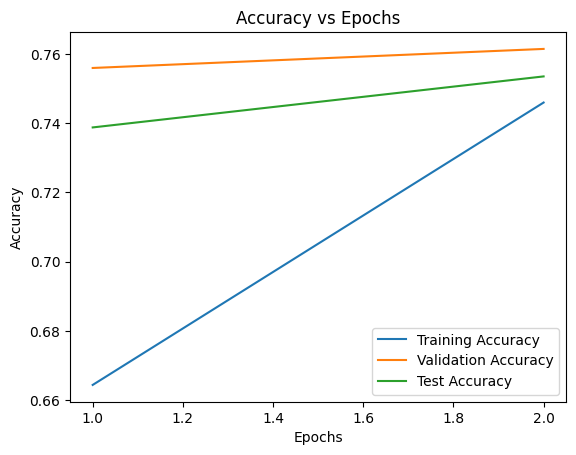

In [4]:
from training.evaluation import get_metric_by_epoch
import matplotlib.pyplot as plt

training_accuracy = get_metric_by_epoch("accuracy", "epoch_train_scores", performance_by_epoch)
val_accuracy = get_metric_by_epoch("accuracy", "epoch_val_scores", performance_by_epoch)
test_accuracy = get_metric_by_epoch("accuracy", "epoch_test_scores", performance_by_epoch)

epochs = range(1, len(training_accuracy)+1)

plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

# Adding legend
plt.legend()

# Display plot
plt.show()
